## TASK 2 - Linear Regression Model to predict the marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [36]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Check for data types of each feature

In [4]:
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

### Check for missing values

In [5]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Lets Visualize the data distribution using hist()

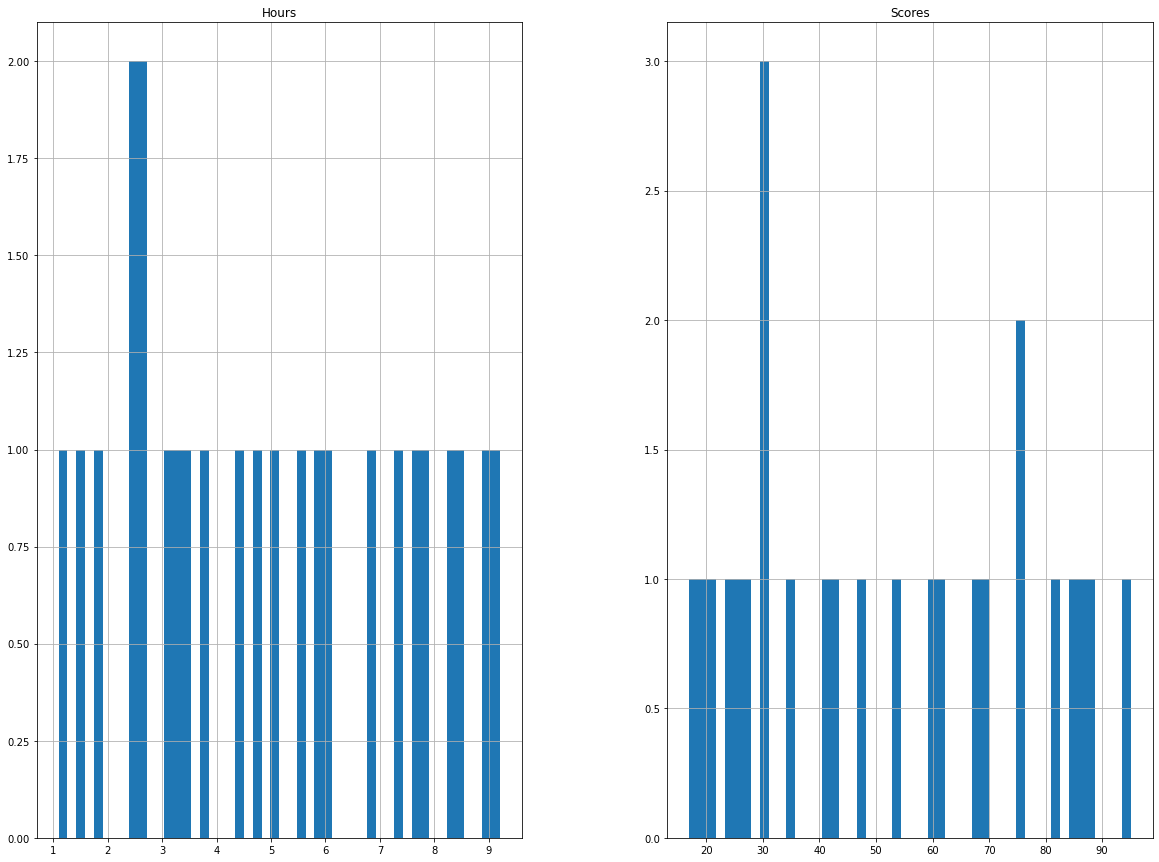

In [7]:
s_data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026052BEAE08>,
      dtype=object)

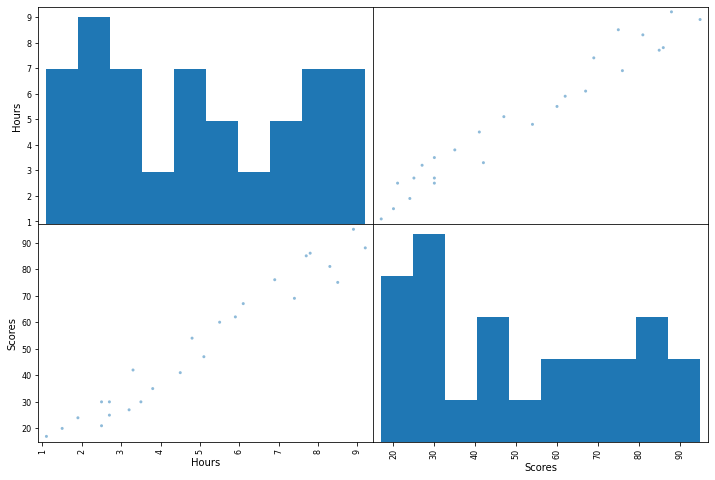

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(s_data,figsize = (12,8))

In [9]:
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:,1].values

### Split the dataset into train and test set using train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [27]:
X_train.shape

(20, 1)

In [28]:
X_test.shape

(5, 1)

In [29]:
y_train.shape

(20,)

In [30]:
y_test.shape

(5,)

### Train ML Model - Linear Regression model

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("Training complete")

Training complete


In [16]:
lin_reg.coef_

array([9.91065648])

In [17]:
lin_reg.intercept_

2.018160041434683

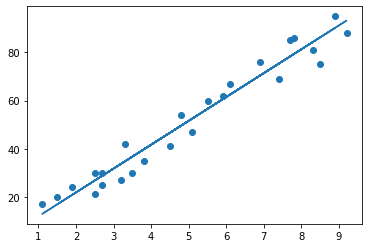

In [18]:
#plotting the regression line
line = lin_reg.coef_*X + lin_reg.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Making Predictions using trained model

In [21]:
print(X_test)
y_pred = lin_reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### lets predict the score for a student if he/she studies for 9.25 hours

In [34]:
# You can also test with your own data
hours = 9.25
own_pred = lin_reg.predict(np.array(hours).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating linear regression model using Mean Absolute Error, Mean Squared Error and Root Mean Squared Error

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
